In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files

uploaded=files.upload()

Saving website_wata.csv to website_wata.csv


In [ ]:
data=pd.read_csv("website_wata.csv")
data.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.26      0.34        57
           1       0.93      0.97      0.95       543

    accuracy                           0.90       600
   macro avg       0.70      0.62      0.64       600
weighted avg       0.88      0.90      0.89       600



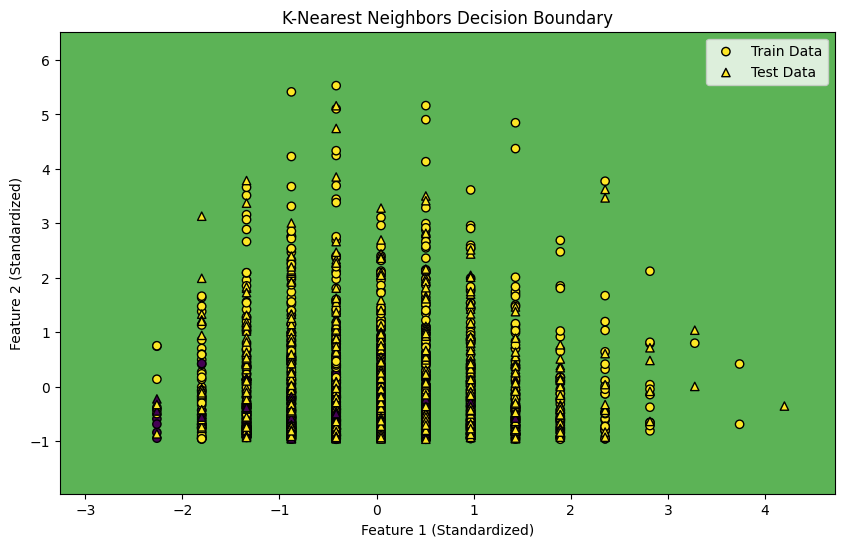

New Data Points (Original):
[[ 5 15  0  0  0  0  0  0  0]
 [10 30  0  0  0  0  0  0  0]
 [ 2  5  0  0  0  0  0  0  0]]
Predicted Conversion Rates:
[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
file_path = 'website_wata.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# One-hot encode the categorical column "Traffic Source"
data_encoded = pd.get_dummies(data, columns=["Traffic Source"], drop_first=True)

# Features (X) and target (y)
X = data_encoded.drop(columns=["Conversion Rate"])
y = data_encoded["Conversion Rate"].astype(int)  # Ensure target is binary (0 or 1)

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 5: Train the KNN model
k = 5  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Step 6: Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

feature_indices = [0, 1]  # Indexes of features to visualize
X_train_vis = X_train_scaled[:, feature_indices]
X_test_vis = X_test_scaled[:, feature_indices]

# Create a meshgrid for decision boundaries
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# *** Changed section start ***
# Create a dataset for prediction with all features,
# filling in values for the features not being visualized with their mean
X_vis_pred = np.zeros((xx.ravel().shape[0], X_train_scaled.shape[1]))
X_vis_pred[:, feature_indices] = np.c_[xx.ravel(), yy.ravel()]
# Fill other features with their means (or other appropriate values)
for i in range(X_train_scaled.shape[1]):
    if i not in feature_indices:
        X_vis_pred[:, i] = X_train_scaled[:, i].mean()

# Predict on the meshgrid with all features
Z = knn.predict(X_vis_pred)
# *** Changed section end ***

Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, edgecolors='k', marker='o', label='Train Data')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, edgecolors='k', marker='^', label='Test Data')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

# Step 8: Predict for future data points
new_data = np.array([[5, 15, 0, 0, 0, 0, 0, 0, 0],
                    [10, 30, 0, 0, 0, 0, 0, 0, 0],
                    [2, 5, 0, 0, 0, 0, 0, 0, 0]])  # Example new data points with 9 features

# Providing example values for the missing features
# You should replace these with meaningful data for your new data points
# The order of features should align with how they were encoded during training

new_data_scaled = scaler.transform(new_data)  # Scale the new data
future_predictions = knn.predict(new_data_scaled)

# Display new data and their predictions
print("New Data Points (Original):")
print(new_data)
print("Predicted Conversion Rates:")
print(future_predictions)

Accuracy: 0.90
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.26      0.34        57
           1       0.93      0.97      0.95       543

    accuracy                           0.90       600
   macro avg       0.70      0.62      0.64       600
weighted avg       0.88      0.90      0.89       600



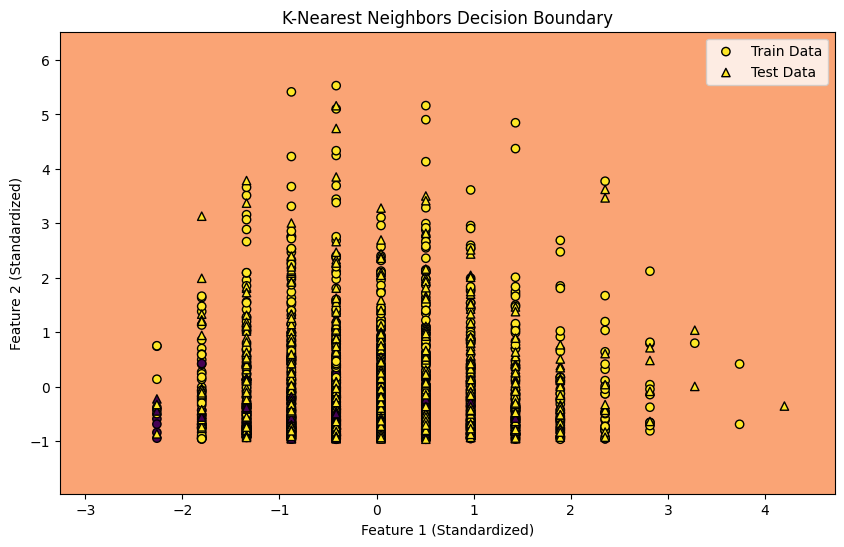

New Data Points (Original):
[[ 5 15  0  0  0  0  0  0  0]
 [10 30  0  0  0  0  0  0  0]
 [ 2  5  0  0  0  0  0  0  0]]
Predicted Conversion Rates:
[1 1 1]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load dataset
file_path = 'website_wata.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Preprocess the data
data_encoded = pd.get_dummies(data, columns=["Traffic Source"], drop_first=True)
X = data_encoded.drop(columns=["Conversion Rate"])
y = data_encoded["Conversion Rate"].astype(int)

# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN model
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

# Select features for visualization
feature_indices = [0, 1]  # Indexes of features to visualize
X_train_vis = X_train_scaled[:, feature_indices]
X_test_vis = X_test_scaled[:, feature_indices]

# Create meshgrid
x_min, x_max = X_train_vis[:, 0].min() - 1, X_train_vis[:, 0].max() + 1
y_min, y_max = X_train_vis[:, 1].min() - 1, X_train_vis[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict on meshgrid with context
X_vis_pred = np.zeros((xx.ravel().shape[0], X_train_scaled.shape[1]))
X_vis_pred[:, feature_indices] = np.c_[xx.ravel(), yy.ravel()]
for i in range(X_train_scaled.shape[1]):
    if i not in feature_indices:
        X_vis_pred[:, i] = X_train_scaled[:, i].mean()

Z = knn.predict(X_vis_pred).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdYlBu)
plt.scatter(X_train_vis[:, 0], X_train_vis[:, 1], c=y_train, edgecolors='k', marker='o', label='Train Data')
plt.scatter(X_test_vis[:, 0], X_test_vis[:, 1], c=y_test, edgecolors='k', marker='^', label='Test Data')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()

# Predict for new data points
new_data = np.array([[5, 15, 0, 0, 0, 0, 0, 0, 0],
                    [10, 30, 0, 0, 0, 0, 0, 0, 0],
                    [2, 5, 0, 0, 0, 0, 0, 0, 0]])

new_data_scaled = scaler.transform(new_data)
future_predictions = knn.predict(new_data_scaled)

# Display predictions
print("New Data Points (Original):")
print(new_data)
print("Predicted Conversion Rates:")
print(future_predictions)


Mean Squared Error (MSE): 0.00
R-squared (R2): 0.16


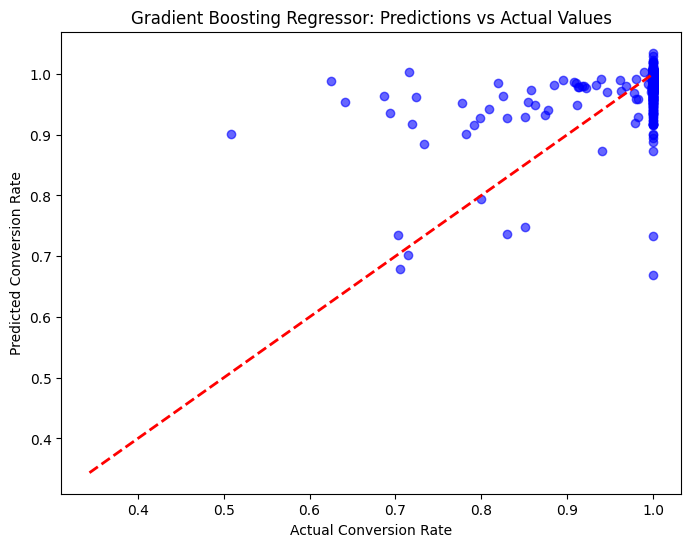

New Data Points (Original):
[[ 5 15  0  0  0  0  0  0  0]
 [10 30  0  0  0  0  0  0  0]
 [ 2  5  0  0  0  0  0  0  0]]
Predicted Conversion Rates:
[1.00040315 1.01237487 0.94020128]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
file_path = 'website_wata.csv'  # Replace with your file path
data = pd.read_csv(file_path)

# Step 2: Preprocess the data
# One-hot encode the categorical column "Traffic Source"
data_encoded = pd.get_dummies(data, columns=["Traffic Source"], drop_first=True)

# Features (X) and target (y)
X = data_encoded.drop(columns=["Conversion Rate"])
y = data_encoded["Conversion Rate"]

# Step 3: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 4: Train the Gradient Boosting Regressor model
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)

# Step 5: Predict and evaluate
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# Step 6: Visualize Predictions vs Actual Values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.title('Gradient Boosting Regressor: Predictions vs Actual Values')
plt.xlabel('Actual Conversion Rate')
plt.ylabel('Predicted Conversion Rate')
plt.show()

# Step 7: Predict for new data points
new_data = np.array([[5, 15, 0, 0, 0, 0, 0, 0, 0],   # Example new data points with 9 features
                     [10, 30, 0, 0, 0, 0, 0, 0, 0],
                     [2, 5, 0, 0, 0, 0, 0, 0, 0]])
new_data_scaled = new_data  # Assuming new data already matches feature scaling
future_predictions = gbr.predict(new_data_scaled)

# Display new data and predictions
print("New Data Points (Original):")
print(new_data)
print("Predicted Conversion Rates:")
print(future_predictions)


Columns in the dataset: Index(['Page Views', 'Session Duration', 'Bounce Rate', 'Traffic Source',
       'Time on Page', 'Previous Visits', 'Conversion Rate'],
      dtype='object')
Mean Absolute Error (MAE): 0.0225116092641397
Mean Squared Error (MSE): 0.0024802128145792993
Root Mean Squared Error (RMSE): 0.049801735055912455
R² Score: 0.20576358031835018


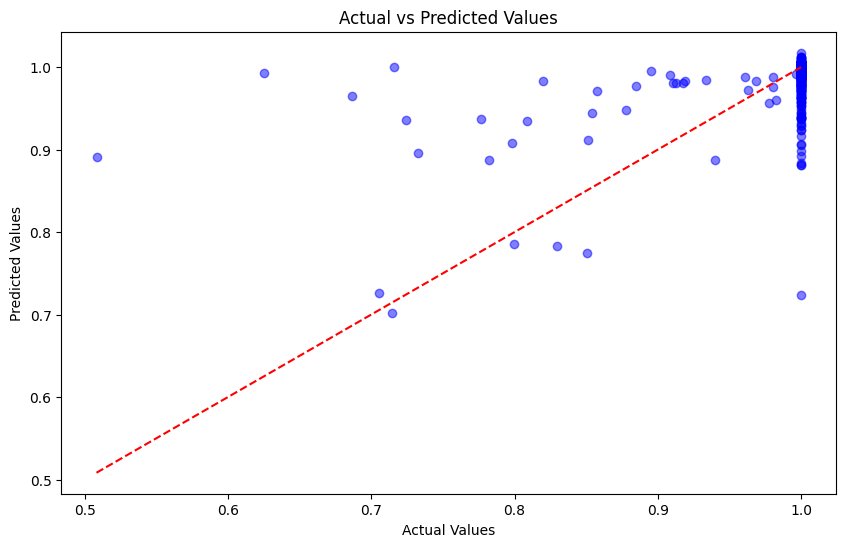

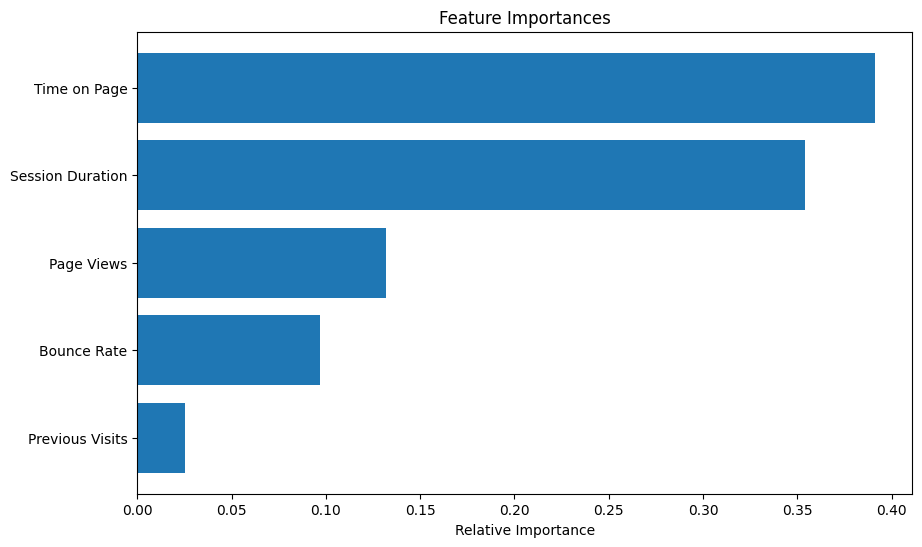

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset
file_path = 'website_wata.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Print column names to identify the exact target column
print("Columns in the dataset:", data.columns)

# Handle missing values (dropping rows with missing data for simplicity)
data = data.dropna()

# Identify the actual target column from the dataset
# Replace 'Target' with the correct column name based on the printed output
target_column = 'Conversion Rate'  # Replace with the actual target column name you find from data.columns

# Verify if target_column exists in the dataset
if target_column not in data.columns:
    raise ValueError(f"Target column '{target_column}' not found in dataset. Please check the column name.")

# Separate features (X) and target (y)
X = data.drop(columns=[target_column, 'Traffic Source'])  # Features
y = data[target_column]  # Target

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Regressor model
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display evaluation results
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R² Score: {r2}")

# Visualization: Actual vs Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Feature Importances (Optional)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()


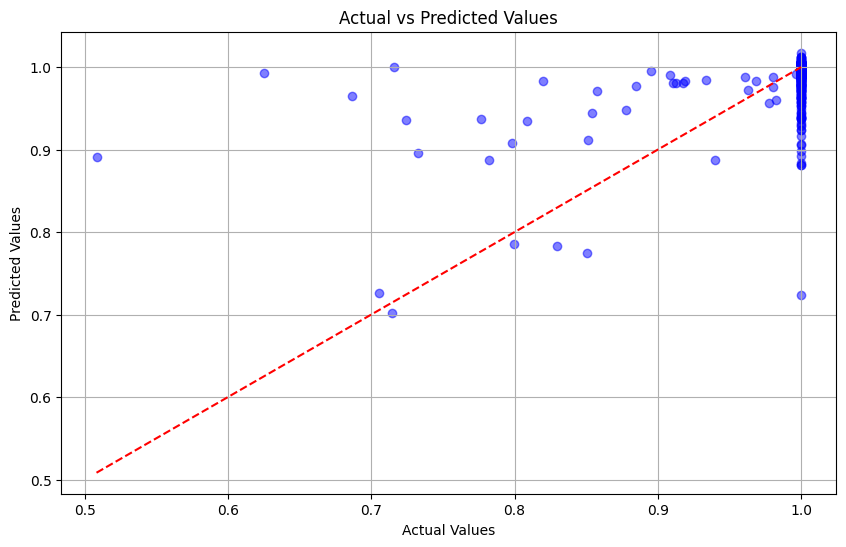

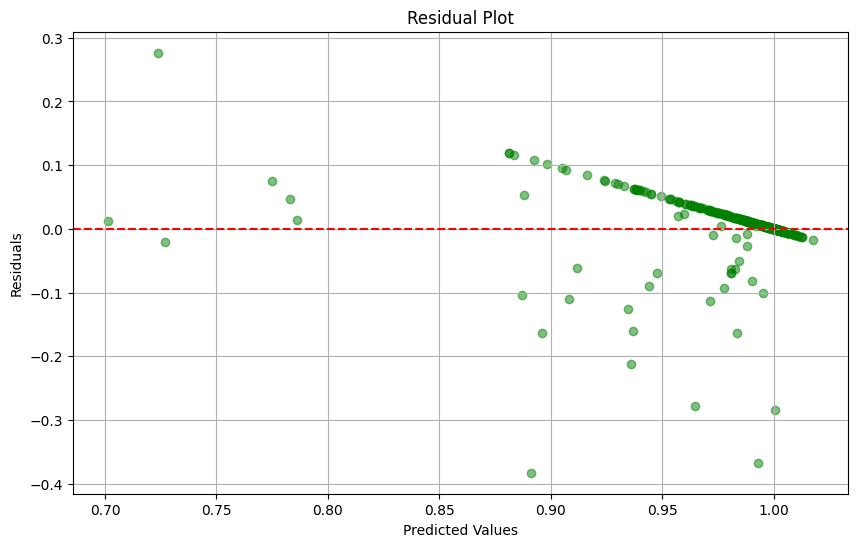

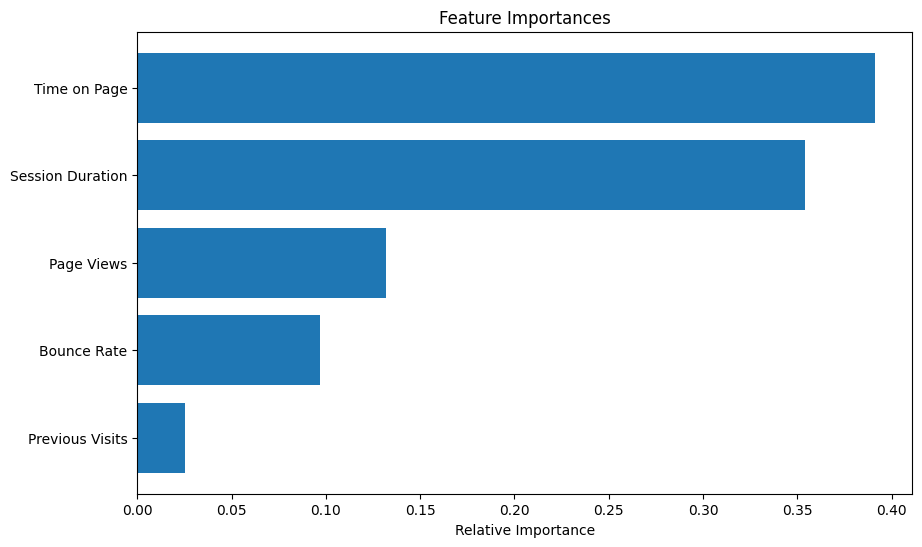

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # Line of perfect prediction
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.grid(True)
plt.show()

# Residual Plot: Actual vs Residuals (for checking model errors)
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='green', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Zero line for residuals
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.grid(True)
plt.show()

# Feature Importances (Optional)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), X.columns[indices])
plt.xlabel('Relative Importance')
plt.show()